# Linear regression using PyTorch 
## What is Linear Regression?
### Regression is a method of modelling a target value based on independent predictors. This method is mostly used for forecasting and finding out cause and effect relationship between variables. Regression techniques mostly differ based on the number of independent variables and the type of relationship between the independent and dependent variables [1].

### In this notebook, we are going to build a regression model that is going to learn proper weights that map the input x (independent variable) to y (dependent variable).

## This notebook is following and borrows from
###### https://youtube.com/playlist?list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4

###### 1. https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a


In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

## + Data Preparation

### We will use the Scikit-learn module to produce a regression dataset

In [4]:
X_np, y_np = datasets.make_regression(n_samples=100, n_features = 1, noise=20, random_state=1)
y_np = y_np.reshape(100, 1)
X = torch.from_numpy(X_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))
n_samples, n_features = X.shape

## + Now, we will first make our Regression Model

In [6]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

## + Next, let's just setup the Loss function and the Optimizer

#### for our loss function, we will use the Mean Squared Error Loss which is as 

### Sum_over_samples (y_pred - y) ^ 2 / num_samples

In [7]:
lr = 0.01 # Learning Rate
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

## + Let's create our training loops by creating the forward pass, loss, and backward pass

In [8]:
num_epochs = 200
for epoch in range(num_epochs):
    y_pred = model(X)
    
    loss = criterion(y_pred, y)
    
    loss.backward()
    
    optimizer.step() # Updates the weights
    
    optimizer.zero_grad() # Zero-out the Gradients
    
    if (epoch) % 10 == 0:
        print("Epoch ", epoch, " loss is ", loss.item());

Epoch  0  loss is  5861.2451171875
Epoch  10  loss is  4337.283203125
Epoch  20  loss is  3236.2568359375
Epoch  30  loss is  2439.8564453125
Epoch  40  loss is  1863.1724853515625
Epoch  50  loss is  1445.166259765625
Epoch  60  loss is  1141.8936767578125
Epoch  70  loss is  921.6724853515625
Epoch  80  loss is  761.6322021484375
Epoch  90  loss is  645.2415771484375
Epoch  100  loss is  560.5384521484375
Epoch  110  loss is  498.8579406738281
Epoch  120  loss is  453.9165954589844
Epoch  130  loss is  421.1552429199219
Epoch  140  loss is  397.2614440917969
Epoch  150  loss is  379.8271789550781
Epoch  160  loss is  367.10125732421875
Epoch  170  loss is  357.808837890625
Epoch  180  loss is  351.0212097167969
Epoch  190  loss is  346.0619201660156


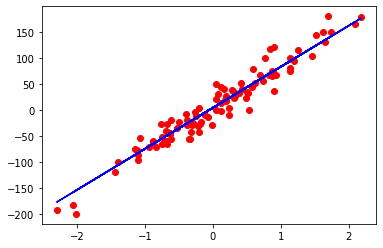

In [9]:
predicted = model(X).detach().numpy()
plt.plot(X_np, y_np, 'ro')
plt.plot(X_np, predicted, 'b')